# Project: Wrangling and Analyze Data`WeRateDogs`
#### Introduction
Real-world data rarely comes clean, it has to go through the process of `wrangling` until it beacomes ideal and suitable for analyses. This process involves `gathering yor data`, `assessing its quality & structure`, and `cleaning`. 

This project is practically based on maximizing the potentials that are attached to the effectiveness of Data Wrangling, which enables us to, analyze and visualize a dataset without any headache. 

We wrangle the tweet archive of Twitter user `@dog_rates`, also known as `WeRateDogs`. `WeRateDogs` is a Twitter account that rates people's dogs with a humorous comment about the dog. These ratings almost always have a denominator of 10. The numerators, though? Almost always greater than 10. 11/10, 12/10, 13/10, etc. Why? Because "they're good dogs Brent.

The datasets for this project will gathered from 3 different sources and they involve:
- A CSV file at hand
- Downloading file programmatically
- Querying a Twitter API.

## Data Gathering
In the cell below, gather **all** three pieces of data for this project and load them in the notebook. **Note:** the methods required to gather each data are different.
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [1]:
# Import libraries that will be used for the project
import numpy as np
import pandas as pd
import requests
import os
import tweepy
import json
from timeit import default_timer as timer
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from wordcloud import WordCloud
import PIL.Image

In [2]:
# Use pandas to read the twitter_archive_enhanced dataset 
twitter_archive = pd.read_csv('twitter-archive-enhanced.csv')

In [3]:
# Test
twitter_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [4]:
# Download the image_prediction file programmatically using requests
"""
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)
with open('image-predictions.tsv', mode = 'wb') as f:
    f.write(response.content)
"""

"\nurl = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'\nresponse = requests.get(url)\nwith open('image-predictions.tsv', mode = 'wb') as f:\n    f.write(response.content)\n"

In [5]:
# read the image-predictions dataset using pandas
image_pred = pd.read_csv('image-predictions.tsv', sep = '\t')


In [6]:
#test
image_pred.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [7]:
# the number of tweet ID that will be queried using Tweepy
tweet_ids = twitter_archive.tweet_id.values
len(tweet_ids)

2356

In [8]:
# Query Twitter's API for each tweet ID JSON data
"""
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            print(tweet, '\n')
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.errors.TweepyException as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)

"""

'\ncount = 0\nfails_dict = {}\nstart = timer()\n# Save each tweet\'s returned JSON as a new line in a .txt file\nwith open(\'tweet_json.txt\', \'w\') as outfile:\n    # This loop will likely take 20-30 minutes to run because of Twitter\'s rate limit\n    for tweet_id in tweet_ids:\n        count += 1\n        print(str(count) + ": " + str(tweet_id))\n        try:\n            tweet = api.get_status(tweet_id, tweet_mode=\'extended\')\n            print("Success")\n            print(tweet, \'\n\')\n            json.dump(tweet._json, outfile)\n            outfile.write(\'\n\')\n        except tweepy.errors.TweepyException as e:\n            print("Fail")\n            fails_dict[tweet_id] = e\n            pass\nend = timer()\nprint(end - start)\nprint(fails_dict)\n\n'

In [9]:
#Create a list to append the tweets JSON data
tweet_list = []
for tweetline in open('tweet_json.txt', 'r'):
    tweet_list.append(json.loads(tweetline)) #load each tweet's JSON to its own line and append it a list

In [10]:
len(tweet_list)

2314

In [11]:
# Read id, retweet_count, favorite_count keys into a pandas DataFrame
tweets = pd.DataFrame(tweet_list, columns = ['id',
                                            'retweet_count',
                                            'favorite_count'])

In [12]:
#Test
tweets

,id,retweet_count,favorite_count
0,892420643555336193,6968,33690
1,892177421306343426,5272,29220
2,891815181378084864,3464,21969
3,891689557279858688,7190,36773
4,891327558926688256,7713,35174
...,...,...,...
2309,666049248165822465,36,88
2310,666044226329800704,115,246
2311,666033412701032449,36,100
2312,666029285002620928,39,112


## Assessing Data
In this section, detect and document at least **eight (8) quality issues and two (2) tidiness issue** using **both** visual and programmatic assessments.

**Assessing the `twitter_archive` table**

#### Visual Assessment

In [13]:
twitter_archive

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


In [14]:
twitter_archive.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1884,674800520222154752,NaN,NaN,2015-12-10 03:59:15 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tedders. He broke his leg saving babie...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/674800520...,11,10,Tedders,None,None,None,None
1718,680176173301628928,NaN,NaN,2015-12-25 00:00:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This pupper is patiently waiting to scare the ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/680176173...,10,10,None,None,None,pupper,None
531,808106460588765185,NaN,NaN,2016-12-12 00:29:28 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have Burke (pupper) and Dexter (doggo)...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/808106460...,12,10,None,doggo,None,pupper,None
1744,679158373988876288,NaN,NaN,2015-12-22 04:35:49 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Rubio. He has too much skin. 11/10 htt...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/679158373...,11,10,Rubio,None,None,None,None
1580,687127927494963200,NaN,NaN,2016-01-13 04:23:58 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Gordon. He's an asshole. 9/10 would still...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/687127927...,9,10,Gordon,None,None,None,None


#### Programmatic Assessment

In [15]:
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [16]:
twitter_archive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [17]:
twitter_archive[868:875]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
868,761750502866649088,NaN,NaN,2016-08-06 02:27:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...","RT @dog_rates: ""Tristan do not speak to me wit...",6.853251e+17,4.196984e+09,2016-01-08 05:00:14 +0000,https://twitter.com/dog_rates/status/685325112...,10,10,None,None,None,None,None
869,761745352076779520,NaN,NaN,2016-08-06 02:06:59 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Guys.. we only rate dogs. Pls don't send any m...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/761745352...,11,10,None,None,None,None,None
870,761672994376806400,NaN,NaN,2016-08-05 21:19:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Ohboyohboyohboyohboyohboyohboyohboyohboyohboyo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/761672994...,10,10,None,None,None,None,None
871,761599872357261312,NaN,NaN,2016-08-05 16:28:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...","This is Sephie. According to this picture, she...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/761599872...,11,10,Sephie,None,None,None,None
872,761371037149827077,NaN,NaN,2016-08-05 01:19:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Oh. My. God. 13/10 magical af h...,7.116948e+17,4.196984e+09,2016-03-20 23:23:54 +0000,https://twitter.com/dog_rates/status/711694788...,13,10,None,None,None,None,None
873,761334018830917632,NaN,NaN,2016-08-04 22:52:29 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bruce. I really want to hear the joke ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/761334018...,10,10,Bruce,None,None,None,None
874,761292947749015552,NaN,NaN,2016-08-04 20:09:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Bonaparte. He's pupset because it's cloud...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/761292947...,11,10,Bonaparte,None,None,None,None


In [18]:
twitter_archive[55:57]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
55,881633300179243008,8.816070e+17,47384430.0,2017-07-02 21:58:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@roushfenway These are good dogs but 17/10 is ...,NaN,NaN,NaN,NaN,17,10,None,None,None,None,None
56,881536004380872706,NaN,NaN,2017-07-02 15:32:16 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a pupper approaching maximum borkdrive...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/881536004...,14,10,a,None,None,pupper,None


**Assessing the `image_pred` table**

#### Visual Assessment

In [19]:
image_pred.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [20]:
image_pred.tail()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2074,892420643555336193,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False


In [21]:
image_pred.sample(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
114,667924896115245057,https://pbs.twimg.com/media/CUTyJpHWcAATl0O.jpg,1,Labrador_retriever,0.209051,True,hog,0.203980,False,Newfoundland,0.165914,True
1141,729838605770891264,https://pbs.twimg.com/ext_tw_video_thumb/72983...,1,stone_wall,0.758218,False,patio,0.074205,False,prison,0.013826,False
1048,713411074226274305,https://pbs.twimg.com/media/CeaLlAPUMAIcC7U.jpg,1,Great_Pyrenees,0.720337,True,Samoyed,0.129542,True,kuvasz,0.122451,True
1354,760252756032651264,https://pbs.twimg.com/media/Coz12OLWgAADdys.jpg,1,radio_telescope,0.155279,False,dam,0.154515,False,crane,0.098040,False
1335,758041019896193024,https://pbs.twimg.com/media/CoUaSKEXYAAYsAl.jpg,1,bookshop,0.794272,False,Cardigan,0.051265,True,Bernese_mountain_dog,0.026596,True


#### Programmatic Assessment

In [22]:
image_pred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [23]:
image_pred.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [24]:
image_pred.jpg_url.isnull().sum()

0

**Assessing the `tweets` table**

#### Visual Assessment

In [25]:
tweets.head()

,id,retweet_count,favorite_count
0,892420643555336193,6968,33690
1,892177421306343426,5272,29220
2,891815181378084864,3464,21969
3,891689557279858688,7190,36773
4,891327558926688256,7713,35174


In [26]:
tweets.tail()

,id,retweet_count,favorite_count
2309,666049248165822465,36,88
2310,666044226329800704,115,246
2311,666033412701032449,36,100
2312,666029285002620928,39,112
2313,666020888022790149,419,2282


In [27]:
tweets.sample(5)

,id,retweet_count,favorite_count
2293,666287406224695296,55,123
608,794926597468000259,2151,9647
1111,728015554473250816,989,3782
2249,667165590075940865,964,2373
1761,676948236477857792,771,1951


#### Programmatic Assessment

In [28]:
tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2314 entries, 0 to 2313
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   id              2314 non-null   int64
 1   retweet_count   2314 non-null   int64
 2   favorite_count  2314 non-null   int64
dtypes: int64(3)
memory usage: 54.4 KB


In [29]:
tweets.describe()

,id,retweet_count,favorite_count
count,2.314000e+03,2314.000000,2314.000000
mean,7.421090e+17,2460.165082,7032.950735
std,6.826852e+16,4165.704787,10929.428928
min,6.660209e+17,1.000000,0.000000
25%,6.779293e+17,491.250000,1209.500000
50%,7.186224e+17,1152.000000,3052.500000
75%,7.986857e+17,2852.000000,8599.250000
max,8.924206e+17,70318.000000,144112.000000


### Quality issues

**twitter_archive** table

1. You only want original ratings (no retweets) that have images

2. Original ratings doesn't include reply tweets as well

3. 'None' and 'a' in the `names` column

4. Erroneous datatype `timestamp`, `tweet_id`.

5. Non-descriptive enough columns `doggo`, `floofer`, `pupper`, `puppo`

6. Unnecessary columns  

7. Outliers in `rating_numerator` column

8. Inaccurate values in `rating_numerator` column

9. inconsistent values in the `rating_denominator` column




**tweets** table

1. inconsistent column name (`id`) instead of `tweet_id`

2. Erroneous datatype `tweet_id`



**image_pred** table

1. Erroneous datatype `tweet_id`

2. Unnecessary columns and rows with NaN values


### Tidiness issues
1. The 3 table should be join on `tweet id` 

2. A new variable `dog_stages` to form a column in the **twitter_archive** table

3. Merge all tables together on `tweet_id`

## Cleaning Data
In this section, clean **all** of the issues documented while assessing. 

**Note:** Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

In [30]:
# Make copies of original pieces of data
twitter_archive_clean = twitter_archive.copy()
image_pred_clean = image_pred.copy()
tweets_clean = tweets.copy()

### Issue #1: You only want original ratings (no retweets) that have images

#### Define

- There are some ratings that is not an original rating, but rather a retweet rating.
- We keep the rows without retweets values and drop every retweet related column


#### Code

In [31]:
twitter_archive_clean = twitter_archive_clean[twitter_archive_clean.retweeted_status_id.isnull()]
twitter_archive_clean = twitter_archive_clean[twitter_archive_clean.retweeted_status_user_id.isnull()]

In [32]:
twitter_archive_clean.drop(['retweeted_status_id','retweeted_status_user_id',
                            'retweeted_status_timestamp'], axis=1, inplace=True)

#### Test

In [33]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   tweet_id               2175 non-null   int64  
 1   in_reply_to_status_id  78 non-null     float64
 2   in_reply_to_user_id    78 non-null     float64
 3   timestamp              2175 non-null   object 
 4   source                 2175 non-null   object 
 5   text                   2175 non-null   object 
 6   expanded_urls          2117 non-null   object 
 7   rating_numerator       2175 non-null   int64  
 8   rating_denominator     2175 non-null   int64  
 9   name                   2175 non-null   object 
 10  doggo                  2175 non-null   object 
 11  floofer                2175 non-null   object 
 12  pupper                 2175 non-null   object 
 13  puppo                  2175 non-null   object 
dtypes: float64(2), int64(3), object(9)
memory usage: 254.9+ 

### Issue #2: Original ratings doesn't include the ones in reply tweets as well

#### Define

- Original ratings doesn't include reply tweets as well
- we keep the rows without values in reply and drop all reply related columns

#### Code

In [34]:
twitter_archive_clean = twitter_archive_clean[twitter_archive_clean.in_reply_to_status_id.isnull()]
twitter_archive_clean = twitter_archive_clean[twitter_archive_clean.in_reply_to_user_id.isnull()]

In [35]:
twitter_archive_clean.drop(['in_reply_to_status_id',
                            'in_reply_to_user_id'], axis=1, inplace=True)

#### Test

In [36]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_id            2097 non-null   int64 
 1   timestamp           2097 non-null   object
 2   source              2097 non-null   object
 3   text                2097 non-null   object
 4   expanded_urls       2094 non-null   object
 5   rating_numerator    2097 non-null   int64 
 6   rating_denominator  2097 non-null   int64 
 7   name                2097 non-null   object
 8   doggo               2097 non-null   object
 9   floofer             2097 non-null   object
 10  pupper              2097 non-null   object
 11  puppo               2097 non-null   object
dtypes: int64(3), object(9)
memory usage: 213.0+ KB


### Issue #3: Missing and invalid values

#### Define 

- Replace the strings **None** and **a** in `name` into NAN values


#### Code

In [37]:
# Replace 'a' and other string values in the column with 'None'
twitter_archive_clean.name = twitter_archive_clean.name.str.replace('^[a-z]', 'None')

#### Test

In [38]:
# Test
twitter_archive_clean.name.str.contains('^[a-z]').value_counts()

False    2097
Name: name, dtype: int64

 #### Code

In [39]:
# Replace 'None' values with NaN
twitter_archive_clean.name = twitter_archive_clean.name.replace('None', np.nan)

#### Test

In [40]:
# Test
twitter_archive_clean[twitter_archive_clean['name'] == 'None']

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [41]:
twitter_archive_clean.name.isnull().sum()

658

In [42]:
twitter_archive_clean.sample(5)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
461,817536400337801217,2017-01-07 01:00:41 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to Eugene &amp; Patti Melt. No matte...,https://twitter.com/dog_rates/status/817536400...,12,10,Eugene,None,None,None,None
2104,670668383499735048,2015-11-28 18:19:37 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a magical dog. Only appe...,https://twitter.com/dog_rates/status/670668383...,10,10,Phineas,None,None,None,None
208,852311364735569921,2017-04-13 00:03:59 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Wiggles. She would like you to spot he...,https://twitter.com/dog_rates/status/852311364...,13,10,Wiggles,None,None,None,None
1197,717009362452090881,2016-04-04 15:22:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Smokey. He's having some sort of exist...,https://twitter.com/dog_rates/status/717009362...,10,10,Smokey,None,None,pupper,None
1750,679001094530465792,2015-12-21 18:10:50 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...",This is Rascal. He's paddling an imaginary can...,https://vine.co/v/iKIwAzEatd6,11,10,Rascal,None,None,None,None


### issue #4: Erroneous datatype

#### Define
- change `timestamp` datatype to DateTime and `tweet_id` to object

#### Code


In [43]:
# Change Datatype
twitter_archive_clean['timestamp'] = pd.to_datetime(twitter_archive_clean['timestamp'])
twitter_archive_clean['tweet_id'] = twitter_archive_clean['tweet_id'].astype(str)

#### Test

In [44]:
# Test
twitter_archive_clean['timestamp'].dtype

datetime64[ns, UTC]

In [45]:
# Test
twitter_archive_clean['tweet_id'].dtype

dtype('O')

In [46]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2097 non-null   object             
 1   timestamp           2097 non-null   datetime64[ns, UTC]
 2   source              2097 non-null   object             
 3   text                2097 non-null   object             
 4   expanded_urls       2094 non-null   object             
 5   rating_numerator    2097 non-null   int64              
 6   rating_denominator  2097 non-null   int64              
 7   name                1439 non-null   object             
 8   doggo               2097 non-null   object             
 9   floofer             2097 non-null   object             
 10  pupper              2097 non-null   object             
 11  puppo               2097 non-null   object             
dtypes: datetime64[ns, UTC](1), int64(2

### issue #5: Non-descriptive variable

#### Define
- Create a new variable(column) `dog_stages`, extract each stages character from the `text`  column values and input them into the `dog_stages` column. 
- Drop `doggo`, `floofer`, `pupper`, `puppo` columns afterwards.
- convert the `dog_stages` column to categories

#### Code

In [47]:
# Extract dog_stages from text
twitter_archive_clean['dog_stages'] = twitter_archive_clean.text.str.extract('(doggo|floofer|pupper|puppo)')

#### Test

In [48]:
twitter_archive_clean.sample(5)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,dog_stages
192,855818117272018944,2017-04-22 16:18:34+00:00,"<a href=""http://twitter.com/download/iphone"" r...",I HEARD HE TIED HIS OWN BOWTIE MARK AND HE JUS...,https://twitter.com/markhalperin/status/855656...,13,10,NaN,None,None,None,None,NaN
1181,719332531645071360,2016-04-11 01:13:34+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Pippa. She managed to start the car bu...,https://twitter.com/dog_rates/status/719332531...,11,10,Pippa,None,None,None,None,NaN
705,785639753186217984,2016-10-11 00:34:48+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Pinot. He's a sophisticated doggo. You...,https://twitter.com/dog_rates/status/785639753...,10,10,Pinot,doggo,None,pupper,None,doggo
1496,692530551048294401,2016-01-28 02:12:04+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to Cody. He's been to like 80 countr...,https://twitter.com/dog_rates/status/692530551...,10,10,Cody,None,None,None,None,NaN
1198,716802964044845056,2016-04-04 01:41:58+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Link. He struggles with couches. 10/10...,https://twitter.com/dog_rates/status/716802964...,10,10,Link,None,None,None,None,NaN


In [49]:
twitter_archive_clean.dog_stages.value_counts()

pupper     240
doggo       80
puppo       29
floofer      4
Name: dog_stages, dtype: int64

#### Code

In [50]:
# Drop columns
twitter_archive_clean.drop(['doggo', 'floofer','pupper', 'puppo'], axis=1, inplace=True)

#### Test

In [51]:
list(twitter_archive_clean)

['tweet_id',
 'timestamp',
 'source',
 'text',
 'expanded_urls',
 'rating_numerator',
 'rating_denominator',
 'name',
 'dog_stages']

#### Code

In [52]:
# Change the Datatype 
twitter_archive_clean.dog_stages = twitter_archive_clean.dog_stages.astype('category')

#### Test

In [53]:
twitter_archive_clean.dog_stages.dtype

CategoricalDtype(categories=['doggo', 'floofer', 'pupper', 'puppo'], ordered=False)

### issue #6: Unnecessary columns

#### Define

- Drop irrelevant columns not useful for analysis

#### Code

In [54]:
# Drop columns
twitter_archive_clean.drop(['expanded_urls',
                           'source'], axis=1, inplace=True)

#### Test

In [55]:
list(twitter_archive_clean)

['tweet_id',
 'timestamp',
 'text',
 'rating_numerator',
 'rating_denominator',
 'name',
 'dog_stages']

In [56]:
twitter_archive_clean

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,dog_stages
0,892420643555336193,2017-08-01 16:23:56+00:00,This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,NaN
1,892177421306343426,2017-08-01 00:17:27+00:00,This is Tilly. She's just checking pup on you....,13,10,Tilly,NaN
2,891815181378084864,2017-07-31 00:18:03+00:00,This is Archie. He is a rare Norwegian Pouncin...,12,10,Archie,NaN
3,891689557279858688,2017-07-30 15:58:51+00:00,This is Darla. She commenced a snooze mid meal...,13,10,Darla,NaN
4,891327558926688256,2017-07-29 16:00:24+00:00,This is Franklin. He would like you to stop ca...,12,10,Franklin,NaN
...,...,...,...,...,...,...,...
2351,666049248165822465,2015-11-16 00:24:50+00:00,Here we have a 1949 1st generation vulpix. Enj...,5,10,NaN,NaN
2352,666044226329800704,2015-11-16 00:04:52+00:00,This is a purebred Piers Morgan. Loves to Netf...,6,10,NaN,NaN
2353,666033412701032449,2015-11-15 23:21:54+00:00,Here is a very happy pup. Big fan of well-main...,9,10,NaN,NaN
2354,666029285002620928,2015-11-15 23:05:30+00:00,This is a western brown Mitsubishi terrier. Up...,7,10,NaN,NaN


### issue #7 & 8: Outliers and inaccurate values in `rating_numerator` column

#### Define
- investigated the outliers and replace the values with the right value.


#### Code

In [57]:
# Check value counts of every ratings
twitter_archive_clean['rating_numerator'].value_counts()

12      486
10      436
11      413
13      287
9       153
8        98
7        52
14       38
5        34
6        32
3        19
4        16
2         9
1         5
27        1
45        1
88        1
144       1
26        1
121       1
44        1
60        1
80        1
75        1
99        1
50        1
204       1
1776      1
165       1
0         1
84        1
24        1
420       1
Name: rating_numerator, dtype: int64

In [58]:
pd.options.display.max_colwidth = 300
twitter_archive_clean[twitter_archive_clean['rating_numerator'] > 15].text

433                                                                           The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd
516     Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx
695                                              This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS
763             This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq
902                                                                                                Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE
979                                                                                                This is Att

In [59]:
# We extract the real ratings from the **text** column to get the exact rating_numerator values that are above 15
twitter_archive_clean[twitter_archive_clean['rating_numerator'] > 15].text.str.extract('(\d+.\d+)')

,0
433,84/70
516,24/7
695,9.75
763,11.27
902,165/150
979,1776/10
1120,204/170
1202,50/50
1228,99/90
1254,80/80


In [60]:
# This ratings are not valid
Not_a_valid_rating = [1776, 420, 24]

- 1776 used for rating a dog dressed up with USA flag, indicating independence day
- 420 ratings wasn't for a dog rather a Rap musician `Snoop dogg`
- 24 not valid enough

In [61]:
# Remaining outlier/invalid values replaced with NaN
twitter_archive_clean['rating_numerator'].replace(Not_a_valid_rating, np.nan, inplace=True)

In [62]:
# We use 15 as the upper boundary for the rating_numerator
twitter_archive_clean[twitter_archive_clean['rating_numerator'] > 15]


,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,dog_stages
433,820690176645140481,2017-01-15 17:52:40+00:00,The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd,84.0,70,NaN,NaN
695,786709082849828864,2016-10-13 23:23:56+00:00,"This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",75.0,10,Logan,NaN
763,778027034220126208,2016-09-20 00:24:34+00:00,This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq,27.0,10,Sophie,NaN
902,758467244762497024,2016-07-28 01:00:57+00:00,Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE,165.0,150,NaN,NaN
1120,731156023742988288,2016-05-13 16:15:54+00:00,Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv,204.0,170,Nonehis,doggo
1202,716439118184652801,2016-04-03 01:36:11+00:00,This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq,50.0,50,Bluebert,NaN
1228,713900603437621249,2016-03-27 01:29:02+00:00,Happy Saturday here's 9 puppers on a bench. 99/90 good work everybody https://t.co/mpvaVxKmc1,99.0,90,NaN,pupper
1254,710658690886586372,2016-03-18 02:46:49+00:00,Here's a brigade of puppers. All look very prepared for whatever happens next. 80/80 https://t.co/0eb7R1Om12,80.0,80,NaN,pupper
1274,709198395643068416,2016-03-14 02:04:08+00:00,"From left to right:\nCletus, Jerome, Alejandro, Burp, &amp; Titson\nNone know where camera is. 45/50 would hug all at once https://t.co/sedre1ivTK",45.0,50,NaN,NaN
1351,704054845121142784,2016-02-28 21:25:30+00:00,Here is a whole flock of puppers. 60/50 I'll take the lot https://t.co/9dpcw6MdWa,60.0,50,NaN,pupper


In [63]:
# Replacing this values with the correct ratings extracted from the **text**
twitter_archive_clean['rating_numerator'].replace(75.0, 9.75, inplace=True)
twitter_archive_clean['rating_numerator'].replace(26.0, 11.26, inplace=True)
twitter_archive_clean['rating_numerator'].replace(27.0, 11.27, inplace=True)

- It was found that some rating_numerator appears to be a float 

In [64]:
twitter_archive_clean[twitter_archive_clean['rating_numerator'] > 15]

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,dog_stages
433,820690176645140481,2017-01-15 17:52:40+00:00,The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd,84.0,70,NaN,NaN
902,758467244762497024,2016-07-28 01:00:57+00:00,Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE,165.0,150,NaN,NaN
1120,731156023742988288,2016-05-13 16:15:54+00:00,Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv,204.0,170,Nonehis,doggo
1202,716439118184652801,2016-04-03 01:36:11+00:00,This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq,50.0,50,Bluebert,NaN
1228,713900603437621249,2016-03-27 01:29:02+00:00,Happy Saturday here's 9 puppers on a bench. 99/90 good work everybody https://t.co/mpvaVxKmc1,99.0,90,NaN,pupper
1254,710658690886586372,2016-03-18 02:46:49+00:00,Here's a brigade of puppers. All look very prepared for whatever happens next. 80/80 https://t.co/0eb7R1Om12,80.0,80,NaN,pupper
1274,709198395643068416,2016-03-14 02:04:08+00:00,"From left to right:\nCletus, Jerome, Alejandro, Burp, &amp; Titson\nNone know where camera is. 45/50 would hug all at once https://t.co/sedre1ivTK",45.0,50,NaN,NaN
1351,704054845121142784,2016-02-28 21:25:30+00:00,Here is a whole flock of puppers. 60/50 I'll take the lot https://t.co/9dpcw6MdWa,60.0,50,NaN,pupper
1433,697463031882764288,2016-02-10 16:51:59+00:00,Happy Wednesday here's a bucket of pups. 44/40 would pet all at once https://t.co/HppvrYuamZ,44.0,40,NaN,NaN
1635,684222868335505415,2016-01-05 04:00:18+00:00,Someone help the girl is being mugged. Several are distracting her while two steal her shoes. Clever puppers 121/110 https://t.co/1zfnTJLt55,121.0,110,NaN,pupper


- the ratings_numerator values here were aggregated for a number of dogs 
- we need to adjust the value per dog to get the exact rating for each dog.

In [65]:
rate_adjusted = lambda tweet_id, num, den: num / den * 10


In [66]:
ratings = rate_adjusted(twitter_archive_clean[twitter_archive_clean['rating_numerator'] > 15].tweet_id,
             twitter_archive_clean[twitter_archive_clean['rating_numerator'] > 15].rating_numerator,
             twitter_archive_clean[twitter_archive_clean['rating_numerator'] > 15].rating_denominator)

In [67]:
ratings

433     12.0
902     11.0
1120    12.0
1202    10.0
1228    11.0
1254    10.0
1274     9.0
1351    12.0
1433    11.0
1635    11.0
1779    12.0
1843    11.0
dtype: float64

- rating per dog

In [68]:
correct_ratings = []
for i in ratings:
    correct_ratings.append(i)
correct_ratings

[12.0, 11.0, 12.0, 10.0, 11.0, 10.0, 9.0, 12.0, 11.0, 11.0, 12.0, 11.0]

In [69]:
# raplace the rating_numerator with the correct per dog values
twitter_archive_clean['rating_numerator'].replace(84, 12, inplace=True)
twitter_archive_clean['rating_numerator'].replace(165, 11, inplace=True)
twitter_archive_clean['rating_numerator'].replace(204, 12, inplace=True)
twitter_archive_clean['rating_numerator'].replace(50, 10, inplace=True)
twitter_archive_clean['rating_numerator'].replace(99, 11, inplace=True)
twitter_archive_clean['rating_numerator'].replace(80, 10, inplace=True)
twitter_archive_clean['rating_numerator'].replace(45, 9, inplace=True)
twitter_archive_clean['rating_numerator'].replace(60, 12, inplace=True)
twitter_archive_clean['rating_numerator'].replace(44, 11, inplace=True)
twitter_archive_clean['rating_numerator'].replace(121, 11, inplace=True)
twitter_archive_clean['rating_numerator'].replace(144, 12, inplace=True)
twitter_archive_clean['rating_numerator'].replace(88, 11, inplace=True)

In [70]:
# test
twitter_archive_clean[twitter_archive_clean['rating_numerator'] > 15]

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,dog_stages


#### Test

In [71]:
twitter_archive_clean[twitter_archive_clean['rating_numerator'] == 9.75]

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,dog_stages
695,786709082849828864,2016-10-13 23:23:56+00:00,"This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",9.75,10,Logan,NaN


In [72]:
twitter_archive_clean[twitter_archive_clean['tweet_id'] == '820690176645140481']

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,dog_stages
433,820690176645140481,2017-01-15 17:52:40+00:00,The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd,12.0,70,NaN,NaN


In [73]:
twitter_archive_clean['rating_numerator'].value_counts()

12.00    490
10.00    438
11.00    418
13.00    287
9.00     154
8.00      98
7.00      52
14.00     38
5.00      34
6.00      32
3.00      19
4.00      16
2.00       9
1.00       5
9.75       1
11.26      1
0.00       1
11.27      1
Name: rating_numerator, dtype: int64

In [74]:
twitter_archive_clean[twitter_archive_clean['rating_numerator'] == 0].text

315    When you're so blinded by your systematic plagiarism that you forget what day it is. 0/10 https://t.co/YbEJPkg4Ag
Name: text, dtype: object

WeRateDogs actually gave this dog a `rating_numerator` of 0

### issue #9: inconsistent values in the `rating_denominator` column

#### Define

- convert all values in the `rating_denominator` column to 10

#### Code

In [75]:
# change all values to 10
twitter_archive_clean['rating_denominator'] = 10

#### Test

In [76]:
# values that are not 10
sum(twitter_archive_clean['rating_denominator'] != 10)

0

In [77]:
# value counts of all rating_denominator 
twitter_archive_clean['rating_denominator'].value_counts()

10    2097
Name: rating_denominator, dtype: int64

In [78]:
# Visual assessment after cleaning
twitter_archive_clean.head()

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,dog_stages
0,892420643555336193,2017-08-01 16:23:56+00:00,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,13.0,10,Phineas,NaN
1,892177421306343426,2017-08-01 00:17:27+00:00,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",13.0,10,Tilly,NaN
2,891815181378084864,2017-07-31 00:18:03+00:00,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,12.0,10,Archie,NaN
3,891689557279858688,2017-07-30 15:58:51+00:00,This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,13.0,10,Darla,NaN
4,891327558926688256,2017-07-29 16:00:24+00:00,"This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",12.0,10,Franklin,NaN


In [79]:
# Visual assessment after cleaning
twitter_archive_clean.tail()

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,dog_stages
2351,666049248165822465,2015-11-16 00:24:50+00:00,Here we have a 1949 1st generation vulpix. Enjoys sweat tea and Fox News. Cannot be phased. 5/10 https://t.co/4B7cOc1EDq,5.0,10,NaN,NaN
2352,666044226329800704,2015-11-16 00:04:52+00:00,This is a purebred Piers Morgan. Loves to Netflix and chill. Always looks like he forgot to unplug the iron. 6/10 https://t.co/DWnyCjf2mx,6.0,10,NaN,NaN
2353,666033412701032449,2015-11-15 23:21:54+00:00,Here is a very happy pup. Big fan of well-maintained decks. Just look at that tongue. 9/10 would cuddle af https://t.co/y671yMhoiR,9.0,10,NaN,NaN
2354,666029285002620928,2015-11-15 23:05:30+00:00,This is a western brown Mitsubishi terrier. Upset about leaf. Actually 2 dogs here. 7/10 would walk the shit out of https://t.co/r7mOb2m0UI,7.0,10,NaN,NaN
2355,666020888022790149,2015-11-15 22:32:08+00:00,Here we have a Japanese Irish Setter. Lost eye in Vietnam (?). Big fan of relaxing on stair. 8/10 would pet https://t.co/BLDqew2Ijj,8.0,10,NaN,NaN


In [80]:
# Visual assessment after cleaning
twitter_archive_clean.sample(5)

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,dog_stages
1839,675891555769696257,2015-12-13 04:14:39+00:00,This is Donny. He's summoning the demon monster Babadook. 6/10 Donny please no that won't be a good time for anyone https://t.co/kiW6Knb7Gp,6.0,10,Donny,NaN
1509,691459709405118465,2016-01-25 03:16:56+00:00,Say hello to Leo. He's a Fallopian Puffalope. Precious af. 12/10 would cuddle https://t.co/LZEi0DpRsH,12.0,10,Leo,NaN
1040,744223424764059648,2016-06-18 17:41:06+00:00,This is actually a pupper and I'd pet it so well. 12/10\nhttps://t.co/RNqS7C4Y4N,12.0,10,Nonectually,pupper
1260,710269109699739648,2016-03-17 00:58:46+00:00,The squad is back for St. Patrick's Day! ☘ 💚\n13/10 for all https://t.co/OcCDb2bng5,13.0,10,NaN,NaN
1734,679736210798047232,2015-12-23 18:51:56+00:00,This pup's name is Sabertooth (parents must be cool). Ears for days. Jumps unannounced. 9/10 would pet diligently https://t.co/iazoiNUviP,9.0,10,NaN,NaN


In [81]:
# Programmatic assessment after cleaning
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2097 non-null   object             
 1   timestamp           2097 non-null   datetime64[ns, UTC]
 2   text                2097 non-null   object             
 3   rating_numerator    2094 non-null   float64            
 4   rating_denominator  2097 non-null   int64              
 5   name                1439 non-null   object             
 6   dog_stages          353 non-null    category           
dtypes: category(1), datetime64[ns, UTC](1), float64(1), int64(1), object(3)
memory usage: 116.9+ KB


In [82]:
# Programmatic assessment after cleaning
twitter_archive_clean.describe()

,rating_numerator,rating_denominator
count,2094.000000,2097.0
mean,10.598510,10.0
std,2.162328,0.0
min,0.000000,10.0
25%,10.000000,10.0
50%,11.000000,10.0
75%,12.000000,10.0
max,14.000000,10.0


### issue #10: inconsistent column name (id) instead of tweet_id in the tweets table

#### Define

- change the column name `id` to `tweet_id` 

#### Code

In [83]:
tweets_clean.head()

,id,retweet_count,favorite_count
0,892420643555336193,6968,33690
1,892177421306343426,5272,29220
2,891815181378084864,3464,21969
3,891689557279858688,7190,36773
4,891327558926688256,7713,35174


In [84]:
# changing the column name
tweets_clean = tweets.rename(columns = {'id': 'tweet_id'})

#### Test 

In [85]:
# Test
tweets_clean.head()

,tweet_id,retweet_count,favorite_count
0,892420643555336193,6968,33690
1,892177421306343426,5272,29220
2,891815181378084864,3464,21969
3,891689557279858688,7190,36773
4,891327558926688256,7713,35174


### issue #11: Erroneous datatype `tweet_id`

#### Define

- convert the `tweet_id` datatype to object 

#### Code

In [86]:
# Change tweet_id dtype
tweets_clean.tweet_id = tweets_clean.tweet_id.astype(str)

#### Test

In [87]:
# Test
tweets_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2314 entries, 0 to 2313
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   tweet_id        2314 non-null   object
 1   retweet_count   2314 non-null   int64 
 2   favorite_count  2314 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 54.4+ KB


### issue #12: Erroneous datatype `tweet_id` in the **image_pred** table

#### Define

- convert the `tweet_id` datatype to object

#### code

In [88]:
# Change the tweet_id dtype
image_pred_clean.tweet_id = image_pred_clean.tweet_id.astype(str)

In [89]:
# Test
image_pred_clean.tweet_id.dtype

dtype('O')

### issue #13: Create a New Column `dog_breed` and `confidence_level`

#### Define

- Create a list of conditions to check through if all dog predictions in the table i.e p1_dog, p2_dog, p3_dogs, are **True** i.e it is a dog. 
if these conditions are met, select the corresponding dog breed i.e p1 with the highest confidence level i.e p1_conf and put it in a new column `dog_breed` using the NumPy.select method.

- Select this highest confidence level i.e p1_con and put it in a new colum `confidence_level` using the NumPy.select method

#### Code

In [90]:
# The condition list
condition_list = [(image_pred_clean.p1_dog == True),
            (image_pred_clean.p2_dog == True),
            (image_pred_clean.p1_dog == True)]

# Choice list which output will be selected from
choice_list = [(image_pred_clean.p1),
          (image_pred_clean.p2),
          (image_pred_clean.p3)]

# the default value is the element inserted in output when conditions evaluate to False
image_pred_clean['dog_breed'] = np.select(condition_list, choice_list, default = np.nan)

#### Test

In [91]:
image_pred_clean.sample(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,dog_breed
1443,775729183532220416,https://pbs.twimg.com/media/CsPxk85XEAAeMQj.jpg,1,web_site,0.989407,False,hand-held_computer,0.002139,False,menu,0.002115,False,NaN
1459,778027034220126208,https://pbs.twimg.com/media/Cswbc2yWcAAVsCJ.jpg,1,clumber,0.946718,True,cocker_spaniel,0.015950,True,Lhasa,0.006519,True,clumber
430,674269164442398721,https://pbs.twimg.com/media/CVt8OmIWIAAbxvJ.jpg,1,pug,0.622921,True,Norwegian_elkhound,0.048659,True,Cardigan,0.016966,True,pug
1793,831262627380748289,https://pbs.twimg.com/media/C4k88lGVMAEKNzb.jpg,1,cocker_spaniel,0.263323,True,Brittany_spaniel,0.200550,True,doormat,0.193414,False,cocker_spaniel
1171,736365877722001409,https://pbs.twimg.com/media/CjgYyuvWkAAHU8g.jpg,3,cup,0.473555,False,toy_poodle,0.082606,True,consomme,0.048298,False,toy_poodle


#### Code

In [92]:
# The condition list
condition_list = [(image_pred_clean.p1_dog == True),
            (image_pred_clean.p2_dog == True),
            (image_pred_clean.p1_dog == True)]

# Choice list which output will be selected from
choice_list = [(image_pred_clean.p1_conf),
          (image_pred_clean.p2_conf),
          (image_pred_clean.p3_conf)]

# the default value is the element inserted in output when conditions evaluate to False
image_pred_clean['confidence_level'] = np.select(condition_list, choice_list, default = np.nan)

#### Test

In [93]:
image_pred_clean.sample(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,dog_breed,confidence_level
324,671879137494245376,https://pbs.twimg.com/media/CVL-goTWoAEUfhy.jpg,1,bee_eater,0.302648,False,toucan,0.219646,False,chickadee,0.156687,False,NaN,NaN
652,682032003584274432,https://pbs.twimg.com/media/CXcQfUNUQAEwFoQ.jpg,1,schipperke,0.997953,True,groenendael,0.000676,True,miniature_pinscher,0.000211,True,schipperke,0.997953
1875,845677943972139009,https://pbs.twimg.com/media/C7xzmngWkAAAp9C.jpg,1,chow,0.808681,True,groenendael,0.123141,True,Newfoundland,0.022143,True,chow,0.808681
1340,758740312047005698,https://pbs.twimg.com/media/CoeWSJcUIAAv3Bq.jpg,1,Chesapeake_Bay_retriever,0.848514,True,Labrador_retriever,0.110054,True,curly-coated_retriever,0.025201,True,Chesapeake_Bay_retriever,0.848514
369,672970152493887488,https://pbs.twimg.com/media/CVbeyGUU8AEq300.jpg,1,leaf_beetle,0.340154,False,rhinoceros_beetle,0.139698,False,crayfish,0.058034,False,NaN,NaN


### issue #14: Unnecessary columns and rows with NaN values

#### Define

- Drop unnecessary columns and rows with NaN values

#### Code

In [94]:
image_pred_clean.drop(['p1', 'p1_conf','p1_dog',
                       'p2', 'p2_conf','p2_dog',
                       'p3', 'p3_conf','p3_dog'], axis = 1, inplace=True)

image_pred_clean.dropna(axis = 0, inplace=True)

#### Test

In [95]:
image_pred_clean

,tweet_id,jpg_url,img_num,dog_breed,confidence_level
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311
...,...,...,...,...,...
2069,891087950875897856,https://pbs.twimg.com/media/DF3HwyEWsAABqE6.jpg,1,Chesapeake_Bay_retriever,0.425595
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,Labrador_retriever,0.168086
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012


In [96]:
image_pred_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1687 entries, 0 to 2073
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   tweet_id          1687 non-null   object 
 1   jpg_url           1687 non-null   object 
 2   img_num           1687 non-null   int64  
 3   dog_breed         1687 non-null   object 
 4   confidence_level  1687 non-null   float64
dtypes: float64(1), int64(1), object(3)
memory usage: 79.1+ KB


### issue #15: Merge Tables

#### Define

- Merge all tables on `tweet_id` and drop unnecessary columns

#### Code

In [97]:
# Merge Dataset
twitter_archive_clean = pd.merge(twitter_archive_clean, tweets_clean, on = 'tweet_id', how = 'inner')
twitter_archive_clean = pd.merge(twitter_archive_clean, image_pred_clean, on = 'tweet_id', how = 'inner')

#### Test

In [98]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1589 entries, 0 to 1588
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            1589 non-null   object             
 1   timestamp           1589 non-null   datetime64[ns, UTC]
 2   text                1589 non-null   object             
 3   rating_numerator    1588 non-null   float64            
 4   rating_denominator  1589 non-null   int64              
 5   name                1164 non-null   object             
 6   dog_stages          256 non-null    category           
 7   retweet_count       1589 non-null   int64              
 8   favorite_count      1589 non-null   int64              
 9   jpg_url             1589 non-null   object             
 10  img_num             1589 non-null   int64              
 11  dog_breed           1589 non-null   object             
 12  confidence_level    1589 non-null 

In [99]:
twitter_archive_clean.isnull().sum()

tweet_id                 0
timestamp                0
text                     0
rating_numerator         1
rating_denominator       0
name                   425
dog_stages            1333
retweet_count            0
favorite_count           0
jpg_url                  0
img_num                  0
dog_breed                0
confidence_level         0
dtype: int64

In [100]:
twitter_archive_clean.drop([331], inplace=True)

In [101]:
twitter_archive_clean.isnull().sum()

tweet_id                 0
timestamp                0
text                     0
rating_numerator         0
rating_denominator       0
name                   425
dog_stages            1332
retweet_count            0
favorite_count           0
jpg_url                  0
img_num                  0
dog_breed                0
confidence_level         0
dtype: int64

In [102]:
twitter_archive_clean.sample(10)

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,dog_stages,retweet_count,favorite_count,jpg_url,img_num,dog_breed,confidence_level
1069,686007916130873345,2016-01-10 02:13:27+00:00,This pupper has a magical eye. 11/10 I can't stop looking at it https://t.co/heAGpKTpPW,11.0,10,NaN,pupper,363,2274,https://pbs.twimg.com/media/CYUwjz-UAAEcdi8.jpg,1,Rhodesian_ridgeback,0.885301
1124,681281657291280384,2015-12-28 01:12:59+00:00,Meet Sarge. His parents signed him up for dancing lessons but his true passion is roller coasters 11/10 very petable https://t.co/KvVoBIgkje,11.0,10,Sarge,NaN,992,2956,https://pbs.twimg.com/media/CXRmDfWWMAADCdc.jpg,1,Saint_Bernard,0.998830
1544,667062181243039745,2015-11-18 19:29:52+00:00,This is Keet. He is a Floridian Amukamara. Absolutely epic propeller hat. Pristine tongue. Nice plaid. 10/10 https://t.co/tz1lpuvXLA,10.0,10,Keet,NaN,45,192,https://pbs.twimg.com/media/CUHhgvHUAAA4aB0.jpg,1,Chesapeake_Bay_retriever,0.825678
1295,673887867907739649,2015-12-07 15:32:42+00:00,When you're having a great time sleeping and your mom comes in and turns on the lights. 10/10 https://t.co/6qYd6BNSPd,10.0,10,NaN,NaN,220,838,https://pbs.twimg.com/media/CVoha_IU4AAZ7vi.jpg,2,Brabancon_griffon,0.216767
1577,666082916733198337,2015-11-16 02:38:37+00:00,Here we have a well-established sunblockerspaniel. Lost his other flip-flop. 6/10 not very waterproof https://t.co/3RU6x0vHB7,6.0,10,NaN,NaN,37,92,https://pbs.twimg.com/media/CT5m4VGWEAAtKc8.jpg,1,pug,0.489814
544,761599872357261312,2016-08-05 16:28:54+00:00,"This is Sephie. According to this picture, she can read. Fantastic at following directions. 11/10 such a good girl https://t.co/7HY9RvCudo",11.0,10,Sephie,NaN,1096,3870,https://pbs.twimg.com/media/CpG_CrlWYAYyuP3.jpg,1,Gordon_setter,0.240427
322,813066809284972545,2016-12-25 17:00:08+00:00,This is Tyr. He is disgusted by holiday traffic. Just trying to get to Christmas brunch on time. 12/10 hurry up pup https://t.co/syuTXARdtN,12.0,10,Tyr,NaN,1821,7523,https://pbs.twimg.com/media/C0iX8OOVEAEIpMC.jpg,1,toy_terrier,0.776400
1074,684914660081053696,2016-01-07 01:49:14+00:00,"""Hello yes I'll just get one of each color thanks"" 12/10 for all https://t.co/AMDsllQs7a",12.0,10,NaN,NaN,1320,3211,https://pbs.twimg.com/media/CYFOP6cWEAAWp-k.jpg,1,chow,0.261288
320,813096984823349248,2016-12-25 19:00:02+00:00,This is Rocky. He got triple-doggo-dared. Stuck af. 11/10 someone help him https://t.co/soNL00XWVu,11.0,10,Rocky,doggo,3367,9997,https://pbs.twimg.com/media/C0izZULWgAAKD-F.jpg,1,Great_Dane,0.128056
371,799297110730567681,2016-11-17 17:04:16+00:00,This is Jeffrey. He's quite the jokester. Takes it too far sometimes. Still 11/10 would pet https://t.co/YDtZcAiMAf,11.0,10,Jeffrey,NaN,2549,9354,https://pbs.twimg.com/media/CxeseRgUoAM_SQK.jpg,1,malamute,0.985028


In [103]:
twitter_archive_clean.duplicated().sum()

0

In [104]:
twitter_archive_clean.describe()

,rating_numerator,rating_denominator,retweet_count,favorite_count,img_num,confidence_level
count,1588.000000,1588.0,1588.000000,1588.000000,1588.000000,1588.000000
mean,10.824484,10.0,2284.169395,8054.508186,1.215365,0.569424
std,1.793495,0.0,4113.710814,11774.814626,0.575900,0.287752
min,0.000000,10.0,11.000000,66.000000,1.000000,0.000010
25%,10.000000,10.0,511.250000,1808.250000,1.000000,0.332807
50%,11.000000,10.0,1139.500000,3777.500000,1.000000,0.574451
75%,12.000000,10.0,2613.250000,10001.500000,1.000000,0.829271
max,14.000000,10.0,70318.000000,144112.000000,4.000000,0.999956


## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [105]:
# Store Dataset
twitter_archive_clean.to_csv('twitter_archive_master.csv', index = False)


## Analyzing and Visualizing Data

#### Q1. What Dog stage has the highest average ratings? 

In [106]:
Dog_stage_rating = twitter_archive_clean.groupby(['dog_stages'])['rating_numerator'].mean().sort_values(ascending=False)
order = Dog_stage_rating.index
Dog_stage_rating

dog_stages
floofer    12.666667
puppo      12.076923
doggo      11.689655
pupper     10.930533
Name: rating_numerator, dtype: float64

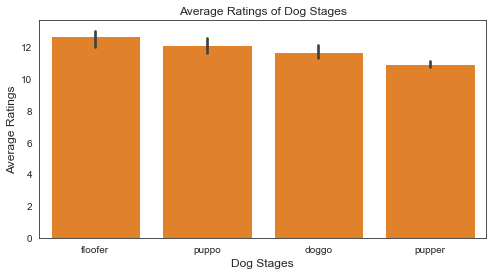

In [107]:
sns.set_style('white')

plt.figure(figsize = [8, 4])
base_color = sns.color_palette()[1]

sns.barplot(data = twitter_archive_clean, x = 'dog_stages',
           y = 'rating_numerator', color = base_color, order = order)
plt.title('Average Ratings of Dog Stages')
plt.xlabel('Dog Stages', fontsize = 12)
plt.ylabel('Average Ratings', fontsize = 12)
plt.show()

**Floofer** is the Dog stage that has the highest average ratings

#### Q2. What Dog breed has the highest average likes (favorite_count)? Top 5

In [108]:
Dog_breed_likes = twitter_archive_clean.groupby(['dog_breed'])['favorite_count'].mean().astype(int).nlargest(n=5)
order = Dog_breed_likes.index
Dog_breed_likes

dog_breed
Bedlington_terrier         21454
Saluki                     20722
French_bulldog             17464
Afghan_hound               14652
black-and-tan_coonhound    14602
Name: favorite_count, dtype: int32

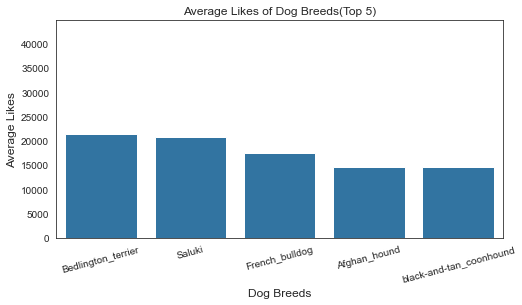

In [109]:
plt.figure(figsize = [8, 4])
base_color = sns.color_palette()[0]

sns.barplot(data = twitter_archive_clean, x = 'dog_breed',
           y = 'favorite_count', color = base_color, order = order, errwidth = 0)
plt.title('Average Likes of Dog Breeds(Top 5)')
plt.xticks(rotation = 15)
plt.xlabel('Dog Breeds', fontsize = 12)
plt.ylabel('Average Likes', fontsize = 12)
plt.show()

Tweets on **Bedlington terrier** Dog Breed has the highest average likes

#### Q3. What is the top 10 most popular Dog names?

In [110]:
twitter_archive_clean['name'].value_counts().nlargest(n=10)

Cooper     10
Oliver      9
Charlie     9
Tucker      9
Penny       8
Lucy        8
Daisy       7
Winston     7
Sadie       7
Toby        6
Name: name, dtype: int64

The most popular Top 10 Dog's name are `Cooper, Oliver, Charlie, Tucker, Penny, Lucy, Daisy, Winston, Sadie and Toby`

#### What Dog breed has the highest average retweets (retweet_count)? Top 5

In [111]:
Dog_breed_retweets = twitter_archive_clean.groupby(['dog_breed'])['retweet_count'].mean().astype(int).nlargest(n=5)
order = Dog_breed_retweets.index
Dog_breed_retweets

dog_breed
Bedlington_terrier    6652
Afghan_hound          4763
standard_poodle       4443
French_bulldog        4384
English_springer      4380
Name: retweet_count, dtype: int32

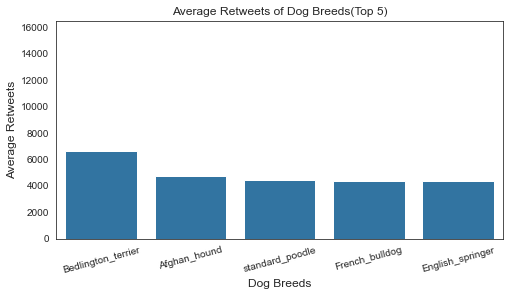

In [112]:
plt.figure(figsize = [8, 4])
base_color = sns.color_palette()[0]

sns.barplot(data = twitter_archive_clean, x = 'dog_breed',
           y = 'retweet_count', color = base_color, order = order, errwidth = 0)
plt.title('Average Retweets of Dog Breeds(Top 5)')
plt.xticks(rotation = 15)
plt.xlabel('Dog Breeds', fontsize = 12)
plt.ylabel('Average Retweets', fontsize = 12)
plt.show()

Tweets on **Bedlington_terrier**  Dog Breed has the highest average retweets

In [113]:
twitter_archive_clean["retweet_count"].corr(twitter_archive_clean["favorite_count"])

0.9290594621813724

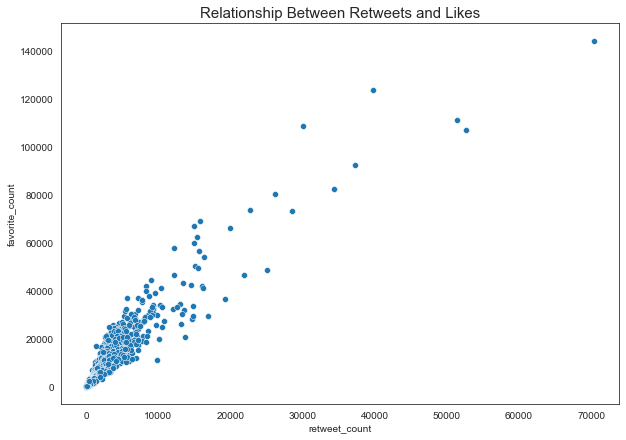

In [114]:
f, ax = plt.subplots(figsize=(10, 7))
sns.scatterplot(data=twitter_archive_clean, x='retweet_count', y='favorite_count')
plt.title('Relationship Between Retweets and Likes', fontsize=15);

There is a **Positive Relationship** between `retweet_count` and `favorite_count`

#### Dog Breed WordCloud Visualization

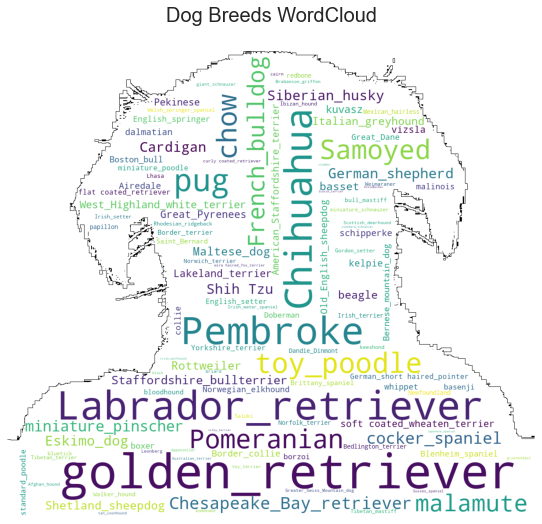

In [115]:
f, ax = plt.subplots(figsize=(11, 9))
text = twitter_archive_clean.loc[:, 'dog_breed'].str.cat(others=None, sep=' ')


python_mask = np.array(PIL.Image.open("dog4.jpg"))

wc = WordCloud(width = 600, height=400, background_color='white', mask=python_mask,
               min_font_size = 3, contour_color='black',
               contour_width= 1, max_words= 200).generate(text)

plt.imshow(wc)
plt.axis("off")
plt.title('Dog Breeds WordCloud', fontsize= 20)
plt.show()

#### REFERENCES

- https://medium.com/analytics-vidhya/demystifying-np-where-and-np-select-76e3ca49e316
- https://www.youtube.com/watch?v=vRbSnlRyJNQ
- https://numpy.org/doc/stable/reference/generated/numpy.select.html